In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
i = pd.read_csv('insurance.csv')

In [92]:
s=i

In [36]:
s1=s.drop(columns=['charges'])

In [37]:
s1

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [48]:
s2=s1

In [4]:
i.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [154]:
o=i.corr()

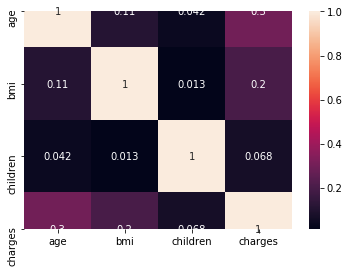

In [155]:
sns.heatmap(o,annot=True)

In [5]:
i.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


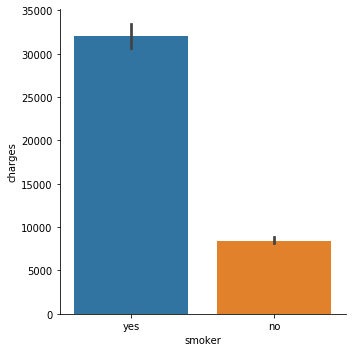

In [153]:
sns.catplot(x='smoker',y='charges',data= i,kind='bar')

Those who smoke has to pay comparitively higer charges

In [7]:
i.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [130]:
X = i.iloc [:,:-1].values
y= i.iloc[:,6].values

# Label Encoding

In [131]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
X[:,1]=  l.fit_transform(X[:,1])
X[:,4]=  l.fit_transform(X[:,4])
X[:,5]=  l.fit_transform(X[:,5])
print(X)


[[19 0 27.9 0 1 3]
 [18 1 33.77 1 0 2]
 [28 1 33.0 3 0 2]
 ...
 [18 0 36.85 0 0 2]
 [21 0 25.8 0 0 3]
 [61 0 29.07 0 1 1]]


# Spliting

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=42) 

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lr.score(X_train,y_train)

0.7417049283233981

In [58]:
lr.intercept_

-11946.606567263034

In [42]:
lr.score(X_test,y_test)

0.7833463107364538

In [38]:
coeff_df = pd.DataFrame(lr.coef_, s1.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,257.056264
sex,-18.791457
bmi,335.781491
children,425.091456
smoker,23647.818096
region,-271.284266


Co-efficient of sex and region is negative which we decrease  the value of y 
* y= -11946.60 + 257.05 (age) - 18.79 (sex) + 335.7 (bmi) + 425.09 (children) + 23647.81 (smoker) - 271.28 (region)

In [39]:
y_pred = lr.predict(X_test)

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,9095.06825,8924.407244
1,5272.17580,7116.295018
2,29330.98315,36909.013521
3,9301.89355,9507.874691
4,33750.29180,27013.350008
...,...,...
263,47055.53210,39116.968669
264,12222.89830,11814.555568
265,6067.12675,7638.107736
266,63770.42801,40959.081722


In [41]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4186.508898366436
Mean Squared Error: 33635210.43117842
Root Mean Squared Error: 5799.587091438357


# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
model_score = dt.score(X_train,y_train)

# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.: ", model_score)

y_predicted = dt.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))

# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

coefficient of determination R^2 of the prediction.:  0.9983078124756306
Mean squared error: 46140034.19
Test Variance score: 0.70


In [146]:
dt.score(X_test,y_test)

0.7027992837962559

In [116]:
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Root Mean Squared Error: 6792.645595721732


In [118]:
# Get numerical feature importances
importances = list(dt.feature_importances_)
importances

[0.13433991680650703,
 0.006488966057170272,
 0.2063170457651914,
 0.02211224806689385,
 0.609528961975938,
 0.021212861328299467]

In [119]:
feature_list = s1.columns

In [120]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances

[('age', 0.13),
 ('sex', 0.01),
 ('bmi', 0.21),
 ('children', 0.02),
 ('smoker', 0.61),
 ('region', 0.02)]

In [121]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('smoker', 0.61),
 ('bmi', 0.21),
 ('age', 0.13),
 ('children', 0.02),
 ('region', 0.02),
 ('sex', 0.01)]

Smoker column has the higher feature importance 

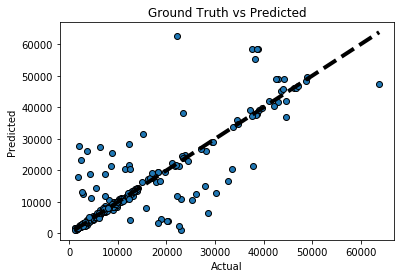

In [122]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [156]:
errors = abs(y_predicted - y_test)

In [157]:
mape = 100 * (errors / y_test)

In [158]:
np.mean(mape)

34.754030775816126

In [159]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 65.25 %.


In both the algorithmns their score is near about same so any models can we used to predict data

# K-means

In [133]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


In [134]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

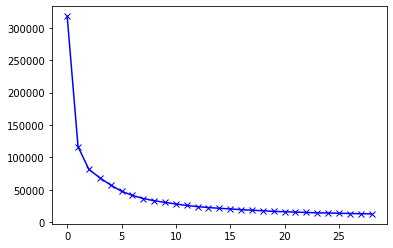

In [135]:
plt.plot(cost, 'bx-')

In [136]:
kmean= KMeans(3)
kmean.fit(X)
labels=kmean.labels_

In [138]:
clusters=pd.concat([s1, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,age,sex,bmi,children,smoker,region,cluster
0,19,female,27.900,0,yes,southwest,2
1,18,male,33.770,1,no,southeast,2
2,28,male,33.000,3,no,southeast,2
3,33,male,22.705,0,no,northwest,0
4,32,male,28.880,0,no,northwest,0


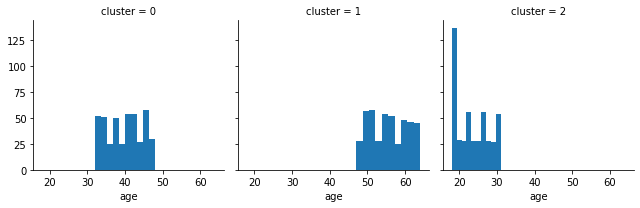

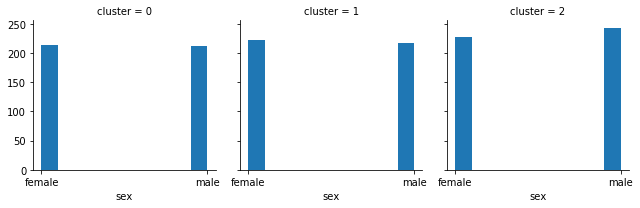

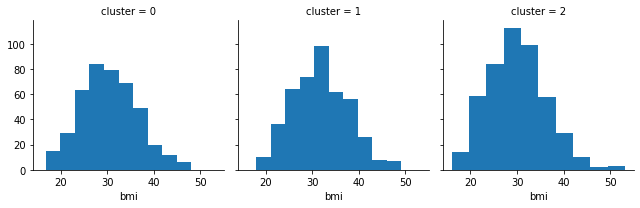

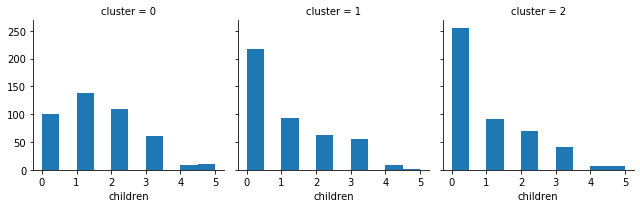

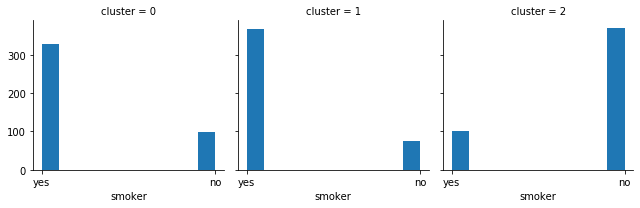

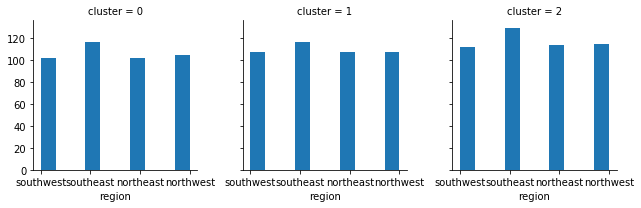

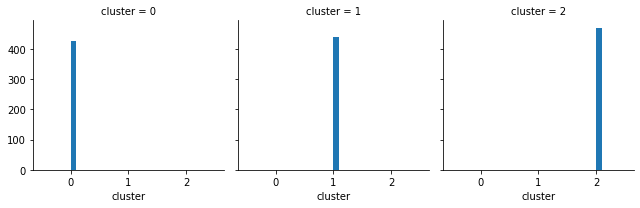

In [139]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

* **cluster 0** - people with 30 to 50 age and with higher number of somker
* **cluster 1**- people with 50 to 60 age and with higher number of somker
* **cluster 2**- people with 20 to 30 age and with lower number of somker

In [140]:
dist = 1 - cosine_similarity(xl)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(1338, 2)

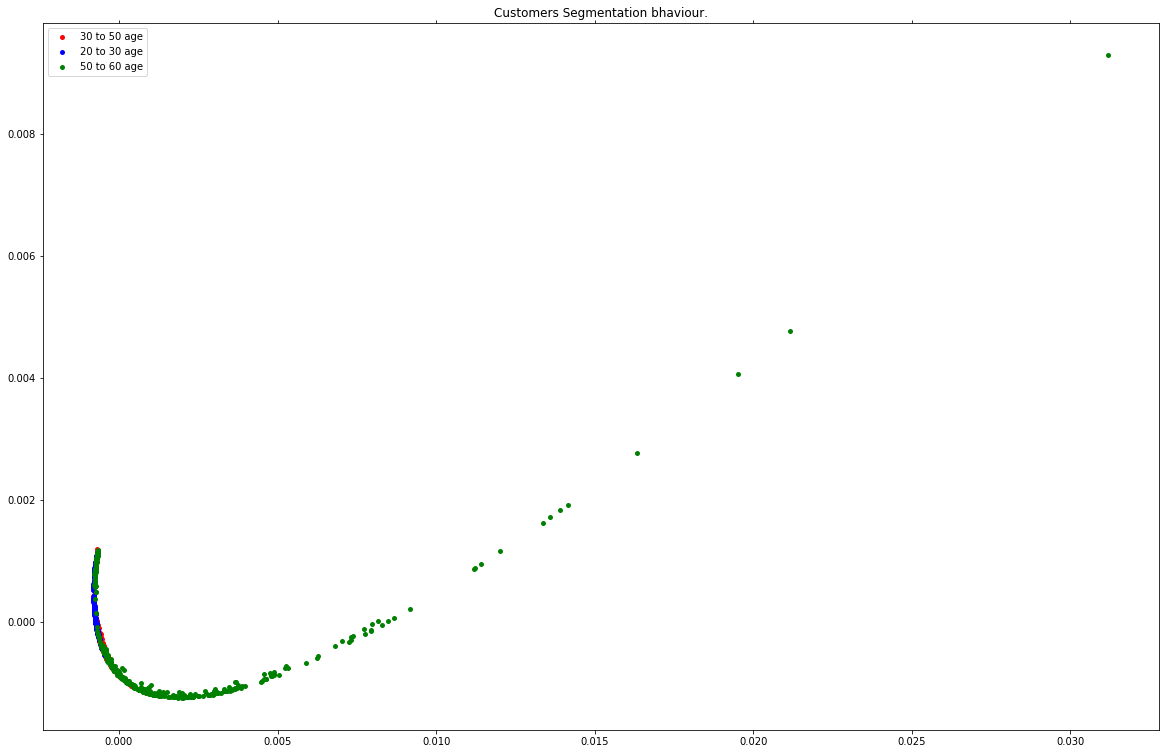

In [142]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green'
         }

names = {0: '30 to 50 age', 
         2: '50 to 60 age', 
         1: '20 to 30 age'
        }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation bhaviour.")
plt.show()